# Importing Libraries

In [14]:
import pandas as pd
import numpy as np

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import VotingClassifier

In [17]:
import warnings
warnings.filterwarnings("ignore")

# PreProcessing

In [18]:
kd= pd.read_csv("kidney_disease.csv")
kd.shape

(400, 26)

In [19]:
kd.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [20]:
kd.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [21]:
kd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [22]:
kd.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [23]:
kd.drop('id',axis=1,inplace=True)

In [24]:
kd.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [25]:
kd[['rbc','pc']] = kd[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
kd[['pcc','ba']] = kd[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})

In [26]:
kd[['htn','dm','cad','pe','ane']]= kd[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})

In [27]:
kd[['appet']]= kd[['appet']].replace(to_replace={'good':0,'poor':1})

In [28]:
kd[['classification']]= kd[['classification']].replace(to_replace={'ckd':1,'ckd\t':1,'notckd':0})
kd[['cad','dm']]= kd[['cad','dm']].replace(to_replace={'\tyes':1,' yes':1,'\tno':0})
kd[['pcv','wc','rc']]= kd[['pcv','wc','rc']].replace(to_replace={'\t?':np.nan})
kd[['pcv','wc']]= kd[['pcv','wc']].replace(to_replace={'\t43':'43','\t6200':'6200','\t8400':'8400'})

In [29]:
for i in kd.columns:
    print("*********************************************************",i,"******************************************************")
    print(set(kd[i].tolist()))
    print()

********************************************************* age ******************************************************
{2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 11.0, 12.0, 14.0, 15.0, 17.0, nan, 19.0, 21.0, 20.0, nan, 24.0, 23.0, 26.0, 27.0, 25.0, nan, 30.0, 29.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 90.0, 22.0, nan, 28.0, nan, nan, nan, nan, nan}

********************************************************* bp ******************************************************
{140.0, nan, nan, nan, nan, nan, 50.0, 180.0, 60.0, nan, 70.0, nan, 80.0, nan, 90.0, 100.0, nan, nan, 110.0, nan, nan, 120.0}

********************************************************* sg ******************************************************
{1.02, 1.005, 1.015, 1.01, 1

In [30]:
kd['age'].fillna(method='bfill',inplace=True)
kd.age.isnull().sum()

0

In [31]:
kd['bp'].fillna(method='bfill',inplace=True)
kd['sg'].fillna(method='bfill',inplace=True)
kd['al'].fillna(method='bfill',inplace=True)
kd['su'].fillna(method='bfill',inplace=True)
kd['bgr'].fillna(method='bfill',inplace=True)
kd['bu'].fillna(method='bfill',inplace=True)
kd['sc'].fillna(method='bfill',inplace=True)
kd['sod'].fillna(method='bfill',inplace=True)
kd['pot'].fillna(method='bfill',inplace=True)
kd['hemo'].fillna(method='bfill',inplace=True)
kd['pcv'].fillna(method='bfill',inplace=True)
kd['wc'].fillna(method='bfill',inplace=True)
kd['rc'].fillna(method='bfill',inplace=True)

In [32]:
kd.isnull().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                  0
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [33]:
k_imp = KNNImputer(n_neighbors = 7)
kd1=pd.DataFrame(k_imp.fit_transform(kd))
kd1.columns=kd.columns
kd1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0.142857,0.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,0.000000,0.0,0.0,0.0,423.0,...,38.0,6000.0,3.9,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.000000,0.0,0.0,0.0,423.0,...,31.0,7500.0,3.9,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.000000,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,1.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.000000,0.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.000000,0.0,0.0,0.0,140.0,...,47.0,6700.0,4.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,0.000000,0.0,0.0,0.0,75.0,...,54.0,7800.0,6.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,0.000000,0.0,0.0,0.0,100.0,...,49.0,6600.0,5.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,0.000000,0.0,0.0,0.0,114.0,...,51.0,7200.0,5.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
kd1.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [35]:
def extract_cat_num(kd1):
    cat_col=[col for col in kd1.columns if kd1[col].dtype=='O']
    num_col=[col for col in kd1.columns if kd1[col].dtype!='O']
    return cat_col,num_col

In [36]:
cat_col,num_col=extract_cat_num(kd1)

In [37]:
cat_col

[]

In [38]:
num_col

['age',
 'bp',
 'sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

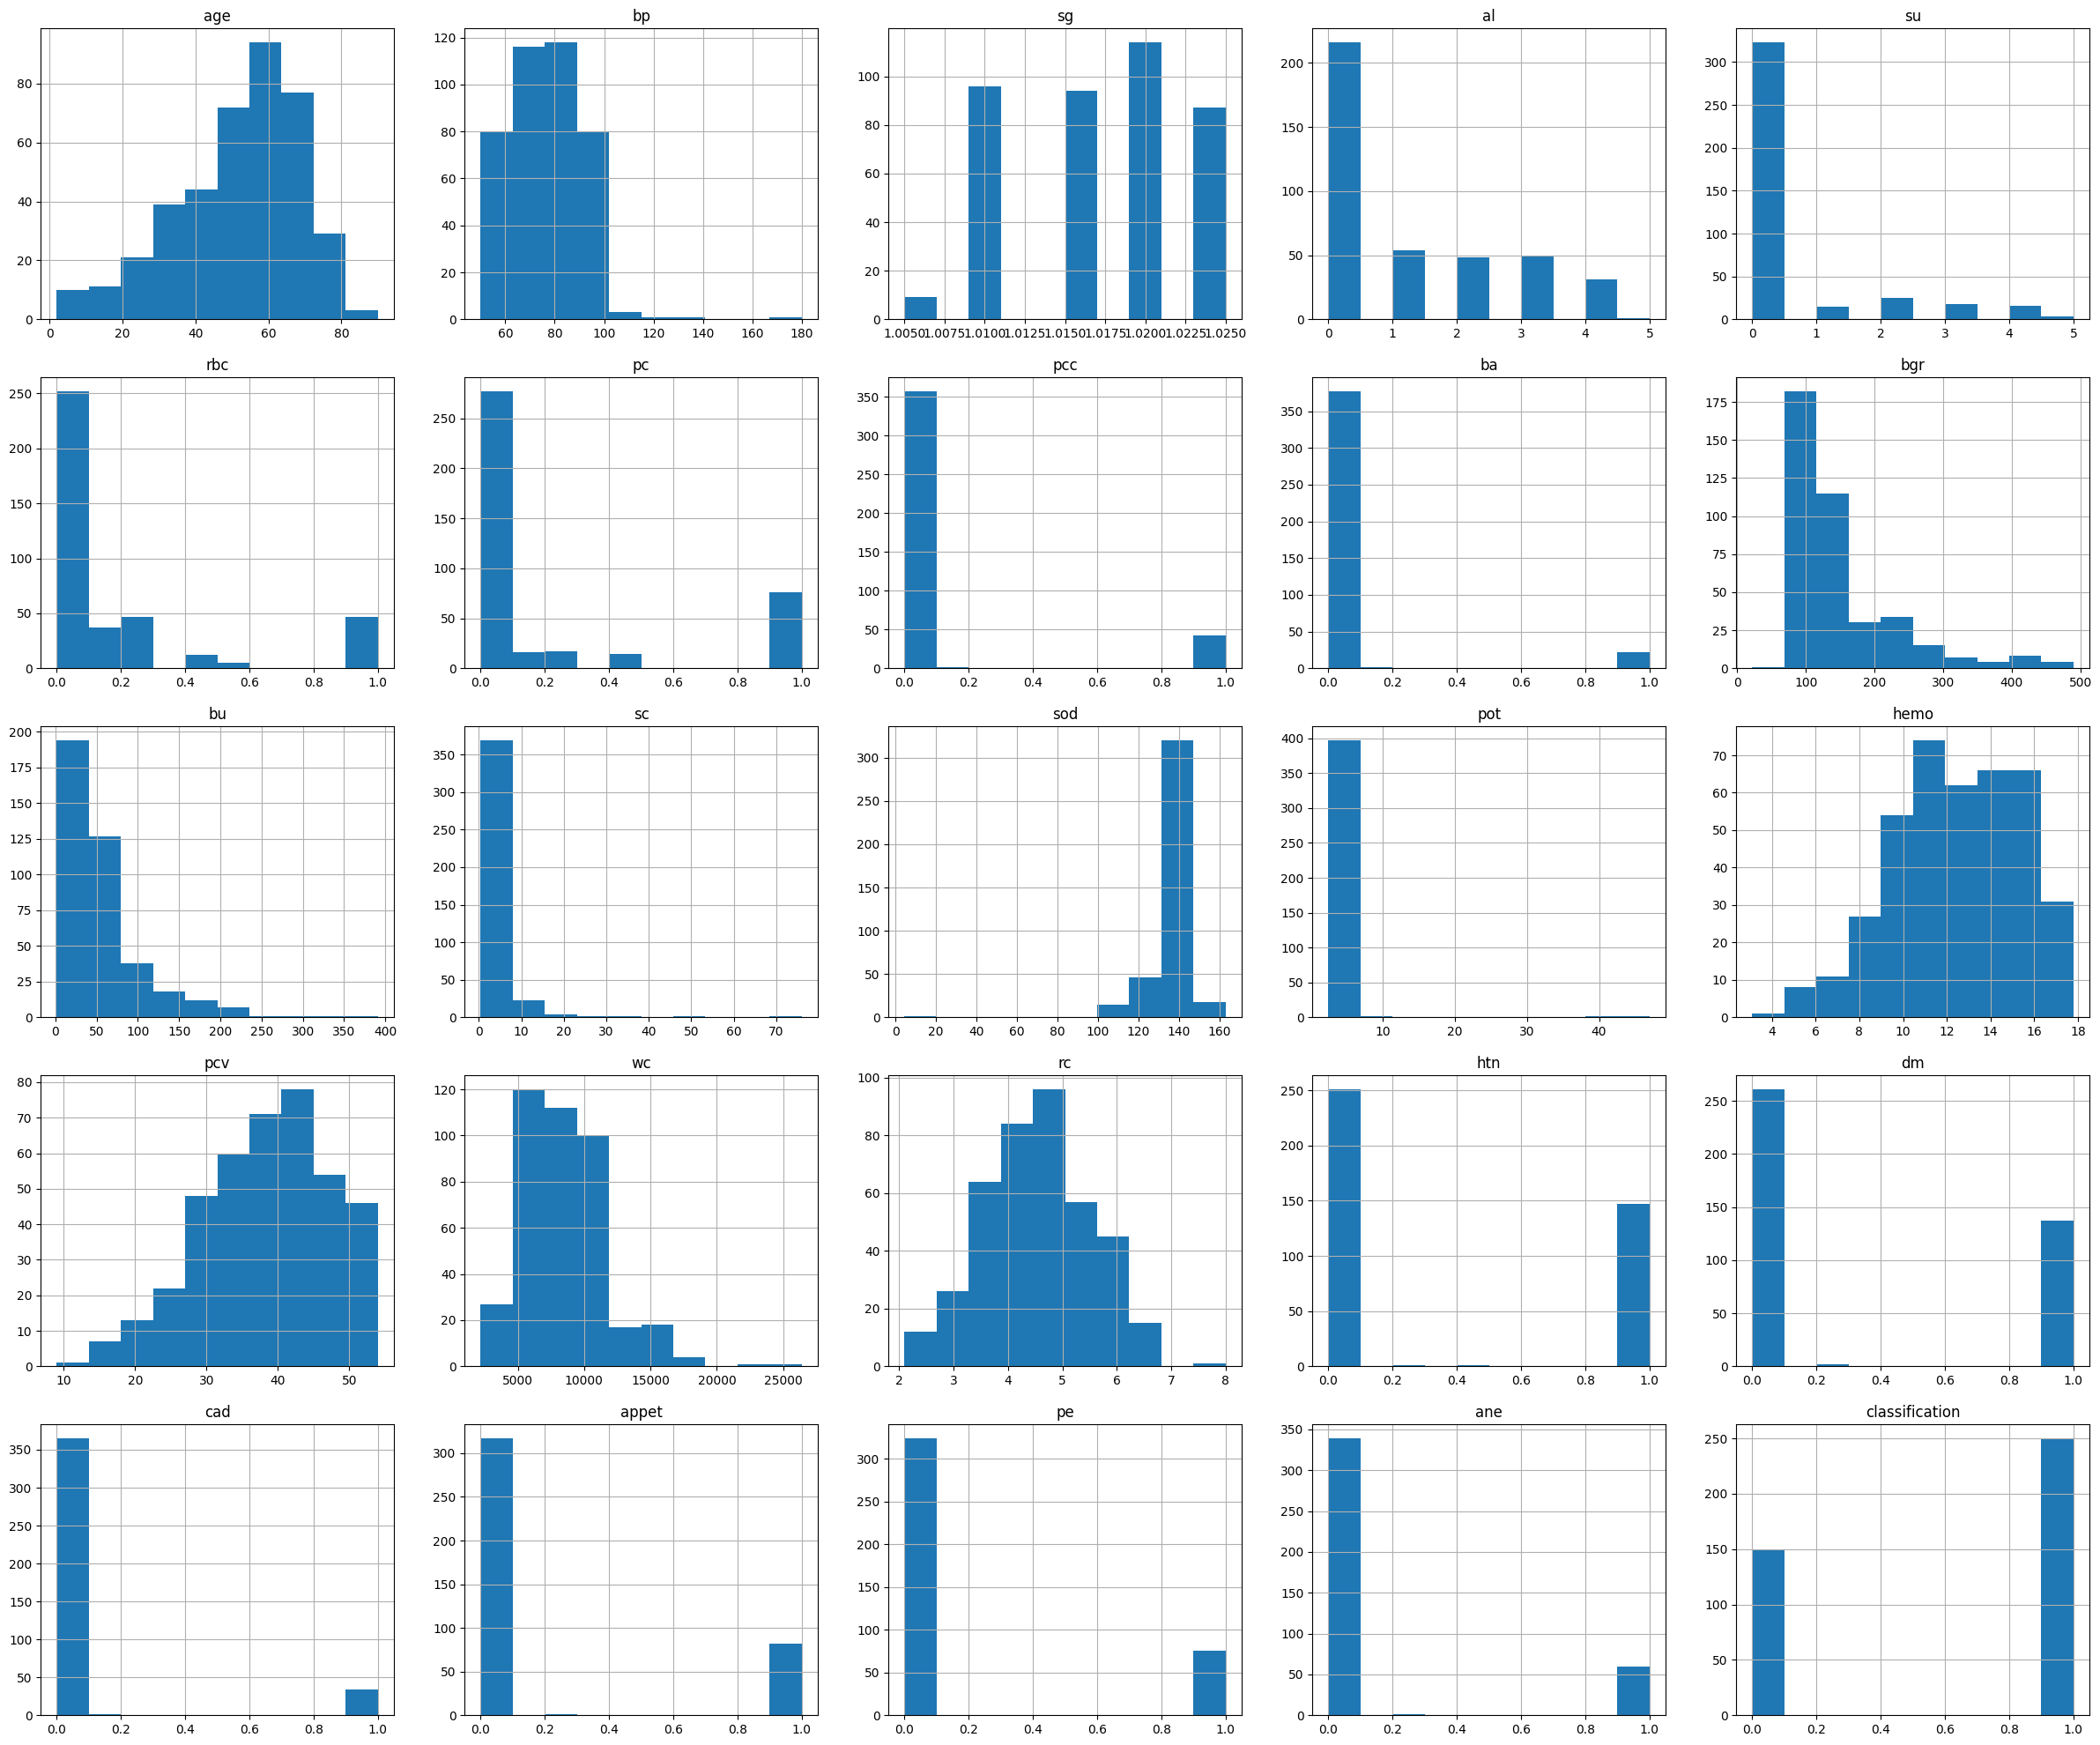

In [39]:
plt.figure(figsize=(30,30))
for i,feature in enumerate(num_col):
    plt.subplot(6,5,i+1)   # 5 rows and 3 columns        
    kd1[feature].hist()
    plt.title(feature)

# Dataset Split

In [40]:
x= kd1.drop('classification',axis=1)
y= kd1['classification']
print(x)
print(y)

      age    bp     sg   al   su       rbc   pc  pcc   ba    bgr  ...  hemo   
0    48.0  80.0  1.020  1.0  0.0  0.142857  0.0  0.0  0.0  121.0  ...  15.4  \
1     7.0  50.0  1.020  4.0  0.0  0.000000  0.0  0.0  0.0  423.0  ...  11.3   
2    62.0  80.0  1.010  2.0  3.0  0.000000  0.0  0.0  0.0  423.0  ...   9.6   
3    48.0  70.0  1.005  4.0  0.0  0.000000  1.0  1.0  0.0  117.0  ...  11.2   
4    51.0  80.0  1.010  2.0  0.0  0.000000  0.0  0.0  0.0  106.0  ...  11.6   
..    ...   ...    ...  ...  ...       ...  ...  ...  ...    ...  ...   ...   
395  55.0  80.0  1.020  0.0  0.0  0.000000  0.0  0.0  0.0  140.0  ...  15.7   
396  42.0  70.0  1.025  0.0  0.0  0.000000  0.0  0.0  0.0   75.0  ...  16.5   
397  12.0  80.0  1.020  0.0  0.0  0.000000  0.0  0.0  0.0  100.0  ...  15.8   
398  17.0  60.0  1.025  0.0  0.0  0.000000  0.0  0.0  0.0  114.0  ...  14.2   
399  58.0  80.0  1.025  0.0  0.0  0.000000  0.0  0.0  0.0  131.0  ...  15.8   

      pcv      wc   rc  htn   dm  cad  appet   pe  

In [41]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.20960108,  0.26607803,  0.496345  , ..., -0.50970976,
        -0.4843221 , -0.42210216],
       [-2.61006042, -1.92086469,  0.496345  , ..., -0.50970976,
        -0.4843221 , -0.42210216],
       [ 0.61006796,  0.26607803, -1.26062845, ...,  1.96804604,
        -0.4843221 ,  2.37857568],
       ...,
       [-2.31732147,  0.26607803,  0.496345  , ..., -0.50970976,
        -0.4843221 , -0.42210216],
       [-2.02458253, -1.19188378,  1.37483172, ..., -0.50970976,
        -0.4843221 , -0.42210216],
       [ 0.3758768 ,  0.26607803,  1.37483172, ..., -0.50970976,
        -0.4843221 , -0.42210216]])

<Axes: ylabel='count'>

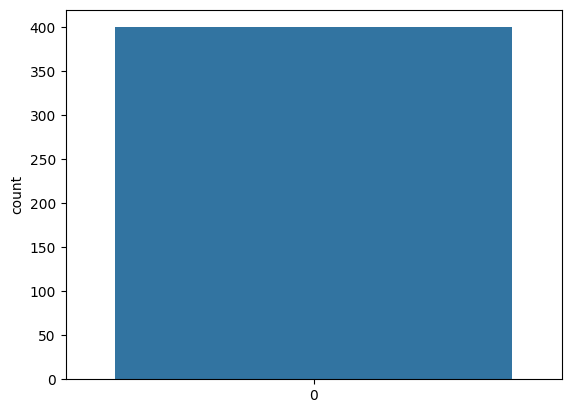

In [42]:
sns.countplot(kd1['classification'])

In [43]:
x_tr,x_tt,y_tr,y_tt= train_test_split(x,y,train_size=0.84,random_state=255)

# Logistic Regression

In [44]:
logr= LogisticRegression(penalty='elasticnet',random_state=620,solver='saga',class_weight={0.0:0.85,1.0:0.15},l1_ratio=0.7)
logr.fit(x_tr,y_tr)

LogisticRegression(class_weight={0.0: 0.85, 1.0: 0.15}, l1_ratio=0.7,
                   penalty='elasticnet', random_state=620, solver='saga')

In [45]:
pred_logr= logr.predict(x_tt)

In [46]:
conf= confusion_matrix(y_tt,pred_logr)
print(conf)

[[20  0]
 [ 5 39]]


In [47]:
print(classification_report(y_tt,pred_logr))

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89        20
         1.0       1.00      0.89      0.94        44

    accuracy                           0.92        64
   macro avg       0.90      0.94      0.91        64
weighted avg       0.94      0.92      0.92        64



In [48]:
print(accuracy_score(y_tt,pred_logr))

0.921875


# Random Forest Classifier

In [49]:
rof= RandomForestClassifier(n_estimators=125,criterion='entropy',random_state=552,class_weight={0.0:0.87,1.0:0.1},max_samples=75,ccp_alpha=0.12)
rof.fit(x_tr,y_tr)

RandomForestClassifier(ccp_alpha=0.12, class_weight={0.0: 0.87, 1.0: 0.1},
                       criterion='entropy', max_samples=75, n_estimators=125,
                       random_state=552)

In [50]:
pred_ens= rof.predict(x_tt)

In [51]:
print(confusion_matrix(y_tt,pred_ens))

[[20  0]
 [ 2 42]]


In [52]:
print(accuracy_score(y_tt,pred_ens))

0.96875


In [53]:
print(classification_report(y_tt,pred_ens))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        20
         1.0       1.00      0.95      0.98        44

    accuracy                           0.97        64
   macro avg       0.95      0.98      0.96        64
weighted avg       0.97      0.97      0.97        64



# Ensemble Learning

In [54]:
# X_test = trial03

# model11= logr
# model22= rof

# pred1=model11.predict_proba(X_test)
# pred2=model22.predict_proba(X_test)

In [55]:
# print(pred1)

In [56]:
# print(pred2)

In [57]:
# avg_arr_ckd = [(pred1[0][1] + pred2[0][1])/2]
# print("ckd probability: ", avg_arr_ckd[0])

In [58]:
# avg_arr_notckd = [(pred1[0][0] + pred2[0][0])/2]
# print("notckd probability: ", avg_arr_notckd[0])

In [59]:
# if avg_arr_ckd[0] >= 0.5:
#     print("ckd")
#     y_test = 1
# else:
#     print("notckd")
#     y_test = 0

In [60]:
model_list= [('log_reg',logr),('rf',rof)]

In [61]:
ensemble_mdl= VotingClassifier(model_list,voting="soft")

In [62]:
ensemble_mdl.fit(x_tr,y_tr)

VotingClassifier(estimators=[('log_reg',
                              LogisticRegression(class_weight={0.0: 0.85,
                                                               1.0: 0.15},
                                                 l1_ratio=0.7,
                                                 penalty='elasticnet',
                                                 random_state=620,
                                                 solver='saga')),
                             ('rf',
                              RandomForestClassifier(ccp_alpha=0.12,
                                                     class_weight={0.0: 0.87,
                                                                   1.0: 0.1},
                                                     criterion='entropy',
                                                     max_samples=75,
                                                     n_estimators=125,
                                                     random_state=552))],
                 voting='soft')

In [63]:
pred_ensm= ensemble_mdl.predict(x_tt)

In [64]:
ensemble_mdl.score(x_tt,y_tt)

0.953125

In [65]:
print(classification_report(y_tt,pred_ensm))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93        20
         1.0       1.00      0.93      0.96        44

    accuracy                           0.95        64
   macro avg       0.93      0.97      0.95        64
weighted avg       0.96      0.95      0.95        64



# Testing

## Logistic Regression

In [66]:
trial00= [[47,100,1.01,0,0,0,0,0,0,204,29,1,139,4.2,9.7,33,9200,4.5,1,0,0,0,0,1]]      #ckd
logr_pred = logr.predict_proba(trial00)
print(logr_pred)
if logr_pred[0][0] <= logr_pred[0][1]:
    print("ckd")
else:
    print("notckd")

[[3.86968585e-08 9.99999961e-01]]
ckd


In [67]:
trial01= [[42,80,1.02,0,0,0,0,0,0,132,24,0.7,140,4.1,14.4,50,5000,4.5,0,0,0,0,0,0]]     #notckd
logr_pred = logr.predict_proba(trial01)
print(logr_pred)
if logr_pred[0][0] <= logr_pred[0][1]:
    print("ckd")
else:
    print("notckd")

[[1.00000000e+00 4.72335983e-11]]
notckd


## Random Forest Classifier

In [68]:
trial02= [[47,100,1.01,0,0,0,0,0,0,204,29,1,139,4.2,9.7,33,9200,4.5,1,0,0,0,0,1]]      #ckd
print(rof.predict_proba(trial02))
rof_p = rof.predict_proba(trial02)
if rof_p[0][0] <= rof_p[0][1]:
    print("ckd")
else:
    print("notckd")

[[0.47107971 0.52892029]]
ckd


In [69]:
trial03= [[42,80,1.02,0,0,0,0,0,0,132,24,0.7,140,4.1,14.4,50,5000,4.5,0,0,0,0,0,0]]     #notckd
print(rof.predict_proba(trial03))
rof_p = rof.predict_proba(trial03)
if rof_p[0][0] <= rof_p[0][1]:
    print("ckd")
else:
    print("notckd")

[[0.51850497 0.48149503]]
notckd


## Ensemble

In [70]:
trial04 = [[47,100,1.01,0,0,0,0,0,0,204,29,1,139,4.2,9.7,33,9200,4.5,1,0,0,0,0,1]]      #ckd
e_pred = ensemble_mdl.predict_proba(trial04)
print(e_pred)
if e_pred[0][0] <= e_pred[0][1]:
    print("ckd")
else:
    print("notckd")

[[0.23553988 0.76446012]]
ckd


In [71]:
trial05= [[42,80,1.02,0,0,0,0,0,0,132,24,0.7,140,4.1,14.4,50,5000,4.5,0,0,0,0,0,0]]     #notckd
e_pred = ensemble_mdl.predict_proba(trial05)
print(e_pred)
if e_pred[0][0] <= e_pred[0][1]:
    print("ckd")
else:
    print("notckd")

[[0.75925249 0.24074751]]
notckd
